<a href="https://colab.research.google.com/github/hagarbarakat/Pattern-Recognition/blob/master/FR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face recognition 
## Assignment One - [Pattern Recognition Course]


Import dataset.

In [0]:
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import eigh
from numpy.linalg import eig, pinv
from google.colab import drive
from sklearn.neighbors import KNeighborsClassifier 
drive.mount('/content/drive')
# !ls "/content/drive/My Drive"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# unzip folder
with open('/content/drive/My Drive/Assignment_1_PR /att-database-of-faces.zip') as f:
  !unzip -q '/content/drive/My Drive/Assignment_1_PR /att-database-of-faces.zip'
  !ls "/content/drive/My Drive/Assignment_1_PR "


att-database-of-faces.zip


Read image

In [0]:
# function to read pictures and append pictures in X array and their labels in Y
def read_pgm(pgmf):
    assert pgmf.readline() == b'P5\n'
    (width, height) = [int(i) for i in pgmf.readline().split()]
    depth = int(pgmf.readline())
    assert depth <= 255

    raster = []
    for y in range(height):
        for y in range(width):
            raster.append(ord(pgmf.read(1)))
    return raster

In [0]:
# append data in X and labels in Y 
# Each folder starts with "s"
X = []
y = []
for i in range(1,41):
  curr_folder = 's'+str(i)
  images = glob.glob(curr_folder + '/*.pgm')
  for img in images:
    f = open(img, "rb")
    X.append(read_pgm(f))
    y.append(i)

# print(len(y))
# print(len(X))
# print(len(X[0]))

Split the Dataset into Training and Test sets

In [0]:
training_X = []
training_y = []
test_X = []
test_y = []
# even indices are for training and odd indices are for testing -> 50:50
for i in range(len(X)):
  if i%2 == 1:
    training_X.append(X[i])
    training_y.append(y[i])
  else:
    test_X.append(X[i])
    test_y.append(y[i])

# print(len(training_X))
# print(len(training_y))
# print(len(test_X))
# print(len(test_y))

###PCA
use eigh as covariance matrix is an asymmetric matrix.

In [0]:
def pca(data):
  # mean of data 
  mean = np.mean(data, axis = 0)
  # center the data
  Z = data - mean
  # covariance for Matrix Z.T
  covariance = np.cov(Z.T)
  # calculate eigenvalues and eigenvetors for covariance matrix
  val, vec = eigh(covariance)
  # sort indices based on eigenvalues descendingly
  indices = np.abs(val).argsort()[::-1]
  eig_val = val[indices]
  # sort eigenvalues' columns based on indices which are sorted descendingly
  eig_vec = vec[:,indices]
  return eig_val, eig_vec, Z

In [0]:
def dimensions (eig_val, eig_vec, Z, alpha): 
  i = 0
  U = []
  # total summation for all eigenvalues
  tot = sum(eig_val)
  current_sum = 0
  # to get minimum number of eigenvectors which are good enough 
  for x in range(len(eig_val)):
      if current_sum/tot < alpha:
        current_sum = current_sum + eig_val[x]
        i = i+1
  # i is number of dimensions
  # 9) Compute the projection matrix U
  U = eig_vec[:, 0 : i]
  # 10) Project the instances into a 2-Dimension space. xນ= PTx
  s = U.T.dot(Z.T)
  s = s.T
  return s, U

In [0]:
def pca_test (data, U):
  mean = np.mean(data, axis = 0)
  Z = data - mean
  s = U.T.dot(Z.T)
  s = s.T
  return s

In [0]:
def knn(eig_val, eig_vec, Z, training_y, test_X, test_y):
  alpha = [0.8, 0.85, 0.9, 0.95]
  K = [1, 3, 5, 7]
  data_test = np.array(test_X)
  for i in range(len(alpha)):
    reduced_training, U = dimensions(eig_val, eig_vec, Z, alpha[i])
    acc = []   # accuracy vector
    # data matrix for test data 
    reduced_testing = pca_test(data_test, U)
    for j in range(len(K)):
      knn = KNeighborsClassifier(n_neighbors= K[j]) 
      knn.fit(reduced_training, training_y) 
      # Calculate the accuracy of the model 
      acc.append(knn.score(reduced_testing, test_y))
    print(acc)
    plt.plot(acc, K, label = alpha[i])
    plt.legend()

[0.935, 0.865, 0.785, 0.78]
[0.945, 0.855, 0.795, 0.795]
[0.94, 0.845, 0.8, 0.765]
[0.925, 0.85, 0.8, 0.77]


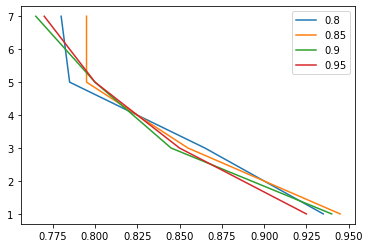

In [0]:
# data matrix for training data
data = np.array(training_X)
eig_val, eig_vec, Z = pca(data)
knn(eig_val, eig_vec, Z, training_y, test_X, test_y)

In [0]:
alpha = [0.8, 0.85, 0.9, 0.95]
K = [1, 3, 5, 7]
data_test = np.array(test_X)
for i in range(len(alpha)):
  reduced_training, U = dimensions(eig_val, eig_vec, Z, alpha[i])
  acc = []
  # data matrix for test data 
  reduced_testing = pca_test(data_test, U)
  for j in range(len(K)):
    knn = KNeighborsClassifier(n_neighbors= K[j]) 
    knn.fit(reduced_training, training_y) 
    # Calculate the accuracy of the model 
    #print(knn.score(reduced_testing, test_y))
    acc.append(knn.score(reduced_testing, test_y))
  print(acc)
  plt.plot(acc, K, label = alpha[i])
  plt.legend()
  #plt.show()


###LDA

### Calculate the mean vector for every class Mu1,Mu2,..., Mu40

In [0]:
def eigen(M):
  val, vec = eig(M)
  indices = np.abs(val).argsort()[::-1]
  eig_val = val[indices]
  eig_vec = vec[:,indices]
  W = np.real(eig_vec[:, 0:39]) # Take 39 eigen vectors
  return  W
  

In [0]:
def transform (data, W):
  transformed = W.T.dot((np.array(data)).T)
  print(transformed.shape)
  return transformed.T

In [0]:
# knn for LDA
def knnLDA(transformed_train, training_y, transformed_test, test_y):
  K = [1, 3, 5, 7]
  acc = [] 
  for j in range(len(K)):
    knn = KNeighborsClassifier(n_neighbors= K[j]) 
    knn.fit(transformed_train, training_y) 
      # Calculate the accuracy of the model 
    acc.append(knn.score(transformed_test, test_y))
  print(acc)
  plt.plot(acc, K)
  #plt.legend()
  #plt.show()

In [0]:
def LDA(training_X, training_y):
  S_tot = np.zeros((10304,10304))
  # total mean for training data
  total_mean = np.mean(training_X,axis=0).reshape(1,10304)
  print(total_mean.shape)
  #initialize Sb with zeroes 
  Sb=np.zeros((10304,10304))
  temp = []
  Z = np.zeros((1,10304))
  padding = np.zeros((1,10304))
  for i in range(40):
      print('size of Z '+str(Z.shape))
      for j in range(5):
          temp.append(np.array(training_X[i*5+j]).reshape(1,10304))
          print("temp: ", np.array(temp).shape)
      # mean for every class in training data
      temps = np.mean(temp, axis = 0)
      print(temps.shape)
      #S = (len(temp)-1)*np.cov(np.array(temp).T)
      #print(i, temps)
      # center data *for each class*
      for k in range(5):
        np.append(Z.reshape(1,10304), np.array(training_X[i*5+k]).reshape(1,10304) - temps , axis = 0)
        #print("x")
      # S matrix -> scatter matrix
    # print("z")
      print("Z : ",np.array(Z).shape)
      Z = np.delete(Z, (0), axis=0)
      S = np.dot(np.array(Z).T, np.array(Z))
      print("y")
      S_tot = S_tot + S
      tempy = (temps - total_mean)
      print(tempy.shape)
      Sb = Sb + (5 * np.dot(tempy, np.transpose(tempy)))
      temp.clear()
      #np.delete(Z)
      Z = np.append(Z,padding , axis =0)
  S_inv = pinv(S_tot)
  M = S_inv.dot(Sb)
  return M

In [0]:
M = LDA(training_X , training_y)
#W = eigen(M)

(1, 10304)
size of Z (1, 10304)
temp:  (1, 1, 10304)
temp:  (2, 1, 10304)
temp:  (3, 1, 10304)
temp:  (4, 1, 10304)
temp:  (5, 1, 10304)
(1, 10304)
Z :  (1, 10304)
y
(1, 10304)
size of Z (1, 10304)
temp:  (1, 1, 10304)
temp:  (2, 1, 10304)
temp:  (3, 1, 10304)
temp:  (4, 1, 10304)
temp:  (5, 1, 10304)
(1, 10304)
Z :  (1, 10304)
y
(1, 10304)
size of Z (1, 10304)
temp:  (1, 1, 10304)
temp:  (2, 1, 10304)
temp:  (3, 1, 10304)
temp:  (4, 1, 10304)
temp:  (5, 1, 10304)
(1, 10304)
Z :  (1, 10304)
y
(1, 10304)
size of Z (1, 10304)
temp:  (1, 1, 10304)
temp:  (2, 1, 10304)
temp:  (3, 1, 10304)
temp:  (4, 1, 10304)
temp:  (5, 1, 10304)
(1, 10304)
Z :  (1, 10304)
y
(1, 10304)
size of Z (1, 10304)
temp:  (1, 1, 10304)
temp:  (2, 1, 10304)
temp:  (3, 1, 10304)
temp:  (4, 1, 10304)
temp:  (5, 1, 10304)
(1, 10304)
Z :  (1, 10304)
y
(1, 10304)
size of Z (1, 10304)
temp:  (1, 1, 10304)
temp:  (2, 1, 10304)
temp:  (3, 1, 10304)
temp:  (4, 1, 10304)
temp:  (5, 1, 10304)
(1, 10304)
Z :  (1, 10304)
y
(1, 

In [0]:
W = eigen(M)

(200, 10304)
(200, 10304)
(39, 200)
(39, 200)
[[ 34. 175. 117. ... 133. 123. 124.]
 [ 37. 154. 128. ... 169. 161. 148.]
 [ 24. 166. 184. ... 170. 169. 166.]
 ...
 [ 40. 160. 202. ... 196. 200. 198.]
 [ 42. 187. 194. ... 191. 192. 181.]
 [ 93. 191. 199. ... 201. 202. 202.]]
[0.425, 0.345, 0.295, 0.27]


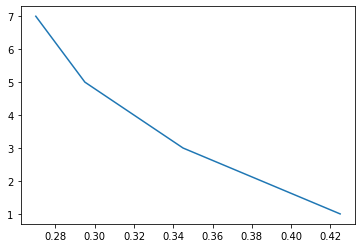

In [0]:
print(np.array(training_X).shape, sep = "\n")
print(np.array(test_X).shape, sep = "\n")
transformed_train = transform(training_X, W)
transformed_test = transform(test_X, W)
print(transformed_train)
knnLDA(transformed_train, training_y, transformed_test, test_y)

##Bonus

In [0]:
train_X = []
train_y = []
X_test = []
y_test = []
# 70:30
for i in range(len(X)):
  if i%10 < 7:
    train_X.append(X[i])
    train_y.append(y[i])
  else:
    X_test.append(X[i])
    y_test.append(y[i])

**PCA**

[0.9916666666666667, 0.95, 0.875, 0.875]
[0.9916666666666667, 0.9666666666666667, 0.9, 0.85]
[0.9916666666666667, 0.9666666666666667, 0.8916666666666667, 0.8583333333333333]
[0.9916666666666667, 0.9583333333333334, 0.9, 0.8416666666666667]


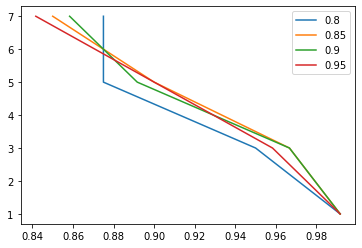

In [0]:
# data matrix for training data
data = np.array(train_X)
eig_val, eig_vec, Z = pca(data)
knn(eig_val, eig_vec, Z, train_y, X_test, y_test)

**LDA**

In [0]:
M = LDA(train_X , train_y)
W = eigen(M)
transformed_traininig = transform(train_X)
transformed_testing = transform(X_test)


0 [48.8 50.8 50.2 ... 37.8 39.4 36.8]
1 [44.  40.6 37.8 ... 54.8 51.  52. ]
2 [ 50.   51.8  49.2 ... 104.4 104.2 103.2]
3 [103.4 103.6 106.6 ...  47.6  47.6  47.4]
4 [115.  115.2 115.2 ...  61.4  60.8  62.6]
5 [120.4 121.8 120.  ...  65.8  64.8  64.8]
6 [129.8 128.8 128.  ...  72.6  71.   74.6]
7 [152.6 151.8 151.  ... 102.4 103.8 104.6]
8 [96.  97.2 96.2 ... 78.6 77.2 78.2]
9 [66.6 65.4 67.8 ... 62.2 60.6 63.4]
10 [121.2 119.4 120.2 ...  65.   63.4  60.2]
11 [111.6 114.8 114.2 ...  75.4  75.   75.8]
12 [120.  117.6 119.8 ...  59.   57.   62.4]
13 [135.2 131.2 133.6 ...  26.8  30.6  34.6]
14 [48.  47.  46.4 ... 32.8 32.8 37.6]
15 [84.2 82.8 83.4 ... 36.6 38.6 31.6]
16 [105.2 106.2 106.2 ...  35.   35.6  30.4]
17 [108.2 108.8 107.6 ...  21.2  24.4  24. ]
18 [ 58.   60.2  57.4 ... 120.4 125.6 109.6]
19 [ 75.   76.   78.2 ... 116.2 109.6 109. ]
20 [71.8 71.  71.6 ... 70.8 48.8 53.2]
21 [62.8 61.4 61.6 ... 66.8 72.2 65. ]
22 [53.4 55.  56.6 ... 53.  52.6 50. ]
23 [64.2 66.8 66.2 ... 50.6 5

NameError: ignored

No handles with labels found to put in legend.


[0.4166666666666667, 0.35833333333333334, 0.38333333333333336, 0.38333333333333336]


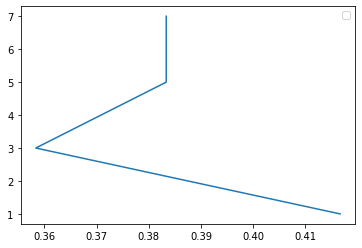

In [0]:
knnLDA(transformed_traininig, train_y, transformed_testing, y_test)